In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Xtr=np.loadtxt("D:/freeLancing/Mini ML As-2/TrainData.csv") 
Ytr=np.loadtxt("D:/freeLancing/Mini ML As-2/TrainLabels.csv")
Xts=np.loadtxt("D:/freeLancing/Mini ML As-2/TestData.csv")

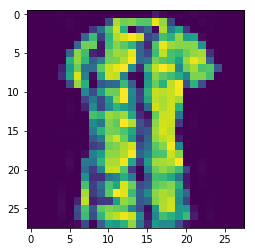

In [4]:
plt.imshow(Xts[1].reshape(28,28))

In [5]:
print(Xtr.shape)
print(Xts.shape)
print(Ytr.shape)

(12000, 784)
(2000, 784)
(12000,)



Shuffling the training dataset

In [15]:
np.random.seed(101)
shuffle_index = np.random.permutation(12000)
X_train, y_train = Xtr[shuffle_index], Ytr[shuffle_index]

After shuffling,The image at X_train[4]

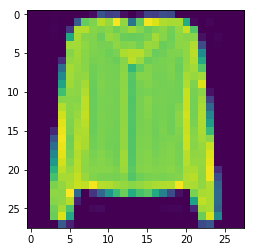

In [16]:
plt.imshow(X_train[4].reshape(28,28))

# Feature Extraction

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [18]:
def featureExtraction(X,Y):
    # define feature selection
    fs = SelectKBest(score_func=f_classif,)
    # apply feature selection
    X_selected = fs.fit_transform(X,Y)
    return X_selected

In [19]:
x_new_train=featureExtraction(X_train,y_train)
x_new_train.shape

(12000, 10)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_new_train.astype(np.float64))

# Using 5-fold cross-validation, optimize hyperparameters

First technique

LogisticRegression

In [22]:
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)
import time

from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_new_train, Ytr)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.504833 using {'dual': False, 'max_iter': 100}
Execution time: 3.01692795753479 ms


Second technique

Random Forest

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_new_train, Ytr)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.500500 using {'max_features': 'sqrt', 'n_estimators': 10}
0.500500 (0.003595) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.496750 (0.008245) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.500167 (0.009268) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.494000 (0.007483) with: {'max_features': 'log2', 'n_estimators': 10}
0.500167 (0.015362) with: {'max_features': 'log2', 'n_estimators': 100}
0.498250 (0.011901) with: {'max_features': 'log2', 'n_estimators': 1000}


In [24]:
# using two techniques. firstly logistic regression and secondly descion tree


Third tech



In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x_new_train , Ytr, cv=5, scoring='accuracy')
scores

array([0.49645981, 0.49916667, 0.49541667, 0.49291667, 0.48770321])